In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("diplom.xlsx", sheet_name="data")

In [3]:
data.drop([u'Не продано'], axis = 1, inplace=True)

In [4]:
target = data.loc[:,u'Продано']
features =  data.drop([u'Продано'], axis = 1)

In [5]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18527 entries, 0 to 18526
Data columns (total 6 columns):
Цена          18527 non-null int64
Количество    18527 non-null int64
Дата          18527 non-null object
Время         18527 non-null object
Название      18527 non-null object
Тип           18527 non-null object
dtypes: int64(2), object(4)
memory usage: 868.5+ KB
None


In [6]:
features[u'Дата'] = features[u'Дата'].apply(pd.to_datetime)

In [7]:
data.head(10)

,Цена,Количество,Дата,Время,Название,Тип,Продано
0,500,4,21.10.15,19:00,Человек из ресторана,Ложа,4
1,1000,26,21.10.15,19:00,Человек из ресторана,Ложа,26
2,300,3,21.10.15,19:00,Человек из ресторана,Ложа,3
3,1000,27,21.10.15,19:00,Человек из ресторана,Ложа,25
4,1000,18,21.10.15,19:00,Человек из ресторана,Ложа,18
5,300,27,21.10.15,19:00,Человек из ресторана,Партер,27
6,500,6,21.10.15,19:00,Человек из ресторана,Партер,6
7,1500,4,21.10.15,19:00,Человек из ресторана,Партер,4
8,3000,80,21.10.15,19:00,Человек из ресторана,Партер,31
9,4000,106,21.10.15,19:00,Человек из ресторана,Партер,49


In [8]:
week = [u'Понедельник', u'Вторник', u'Среда', u'Четверг', u'Пятница',  u'Суббота', u'Воскресенье']
month = [u'Январь',u'Февраль',u'Март',u'Апрель',u'Май',u'Июнь',u'Июль',u'Август',u'Сентябрь',u'Октябрь',u'Ноябрь',u'Декабрь']

features[u'Месяц'] = features[u'Дата'].apply(lambda x: month[x.month-1])
features[u'День недели'] = features[u'Дата'].apply(lambda x: week[x.weekday()])
features.drop([u'Дата'], inplace = True, axis = 1)

In [9]:
features[u'Название'] = features[u'Название'].apply(lambda x: x.replace('\n',' '))

In [10]:
features.sample(10,random_state = 123)

,Цена,Количество,Время,Название,Тип,Месяц,День недели
5596,2000,17,19:00,Лондон Шоу,Партер,Декабрь,Четверг
7551,500,10,19:00,Все оттенки голубого,Ложа,Октябрь,Суббота
15952,2200,4,19:00,Человек из ресторана,Партер,Январь,Воскресенье
9495,1000,41,19:00,Лондон Шоу,Партер,Февраль,Четверг
11875,420,2,19:00,Отелло.,Партер,Июнь,Четверг
1838,6000,9,19:00,Лондон Шоу,Партер,Январь,Суббота
9119,500,4,19:00,Отелло.,Ложа,Январь,Понедельник
18273,1000,1,19:00,Все оттенки голубого,Ложа,Август,Воскресенье
17365,1500,26,19:00,Король Лир,Партер,Февраль,Среда
1963,1200,1,19:00,Константин Райкин. Своим голосом...,Партер,Январь,Вторник


In [11]:
j=1
names = features[u'Название'].copy()
for name in features[u'Название'].unique():
    names[names == name] = "Название "+str(j)
    j+=1

In [12]:
features[u'Название'].unique()

array(['Человек из ресторана', 'Лондон Шоу', 'Все оттенки голубого',
       'Однорукий из Спокана', 'Лекарь поневоле',
       'Константин Райкин. Своим голосом...', 'Закликухи', 'Game over',
       'Отелло.', 'Укрощение', 'Чайка',
       'Константин Райкин. Вечер с Достоевским', 'Король Лир',
       'Ваня и Соня и Маша и Гвоздь', 'Бесприданница', 'НЕБАЛЕТ',
       'НеПушкин', 'Дон Жуан', 'Глупости', 'Всем кого касается'],
      dtype=object)

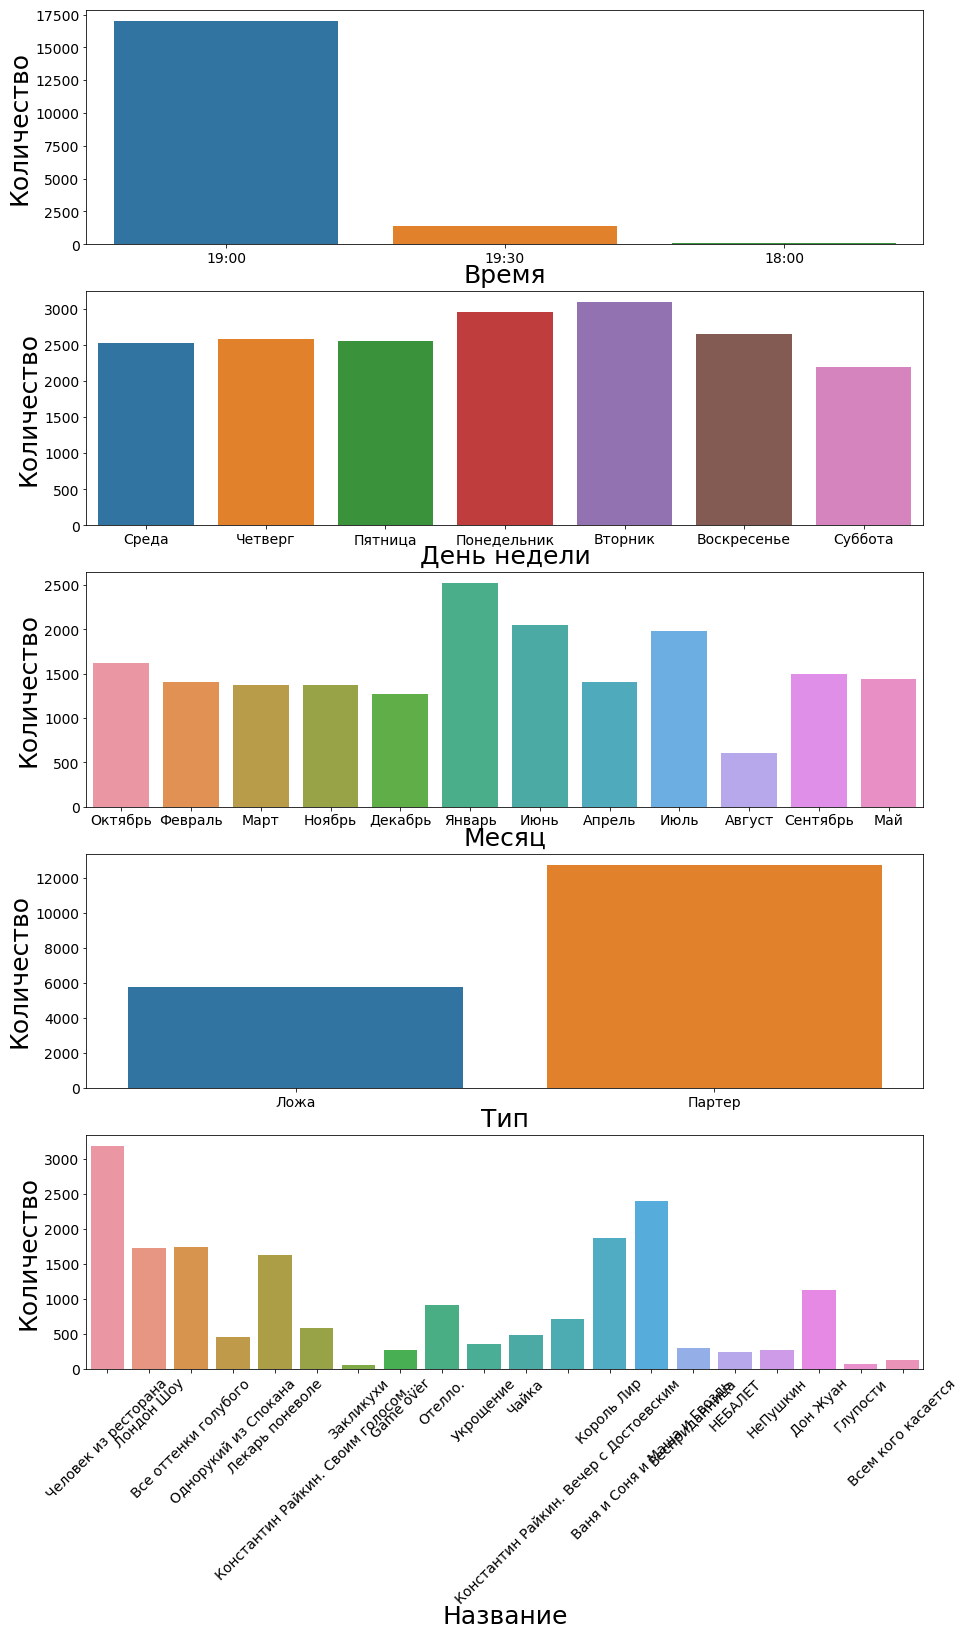

In [13]:
import seaborn as sns
cat_features = [u'Время', u'День недели', u'Месяц',u'Тип', u'Название']
fig, axes = pyplot.subplots(5,1, figsize=(15,25))
pyplot.xticks(rotation=45)
for i in range(len(cat_features)):
    b = sns.countplot(features[cat_features[i]], ax = axes[i])
    b.set_xlabel(cat_features[i],fontsize=25,labelpad=-2)
    b.set_ylabel("Количество",fontsize=25)
    b.tick_params(labelsize=14)

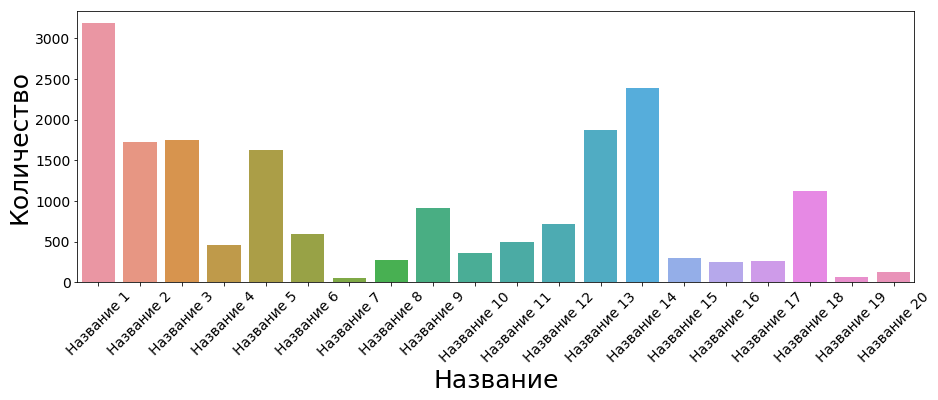

In [14]:
fig, axes = pyplot.subplots(1,1, figsize=(15,5))
pyplot.xticks(rotation=45)
b = sns.countplot(names)
b.set_ylabel("Количество",fontsize=25)
b.tick_params(labelsize=14)
b.set_xlabel("Название",fontsize=25)
b.tick_params(labelsize=14)

In [15]:
cat_features  = cat_features[1:]
features.drop([u'Время'], inplace = True, axis = 1)

In [16]:
real_cols = [u'Количество',u'Цена']

In [17]:
from sklearn.feature_extraction import DictVectorizer as DV
encoder = DV(sparse = False)
encoded_cat_data = encoder.fit_transform(features[cat_features].T.to_dict().values())

In [18]:
from sklearn.externals import joblib
encoder_filename = "encoder.save"
joblib.dump(encoder, encoder_filename) 

C:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['encoder.save']

In [19]:
encoded_cat_data

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [20]:
real_data = features[real_cols]

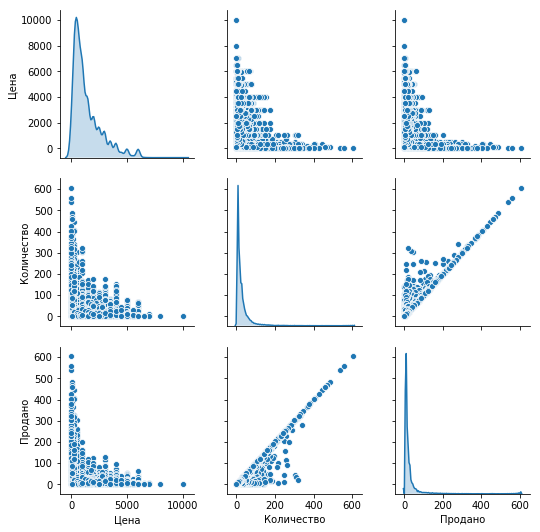

In [21]:
sns.pairplot(data, diag_kind="kde")

In [22]:
data.corr()

,Цена,Количество,Продано
Цена,1.000000,0.005901,-0.137068
Количество,0.005901,1.000000,0.908150
Продано,-0.137068,0.908150,1.000000


In [23]:
data.describe()

,Цена,Количество,Продано
count,18527.000000,18527.000000,18527.000000
mean,1418.426189,20.576834,14.833270
std,1286.902171,33.467064,30.048263
min,10.000000,1.000000,0.000000
25%,500.000000,4.000000,2.000000
50%,1000.000000,9.000000,6.000000
75%,2000.000000,24.000000,15.000000
max,10000.000000,605.000000,605.000000


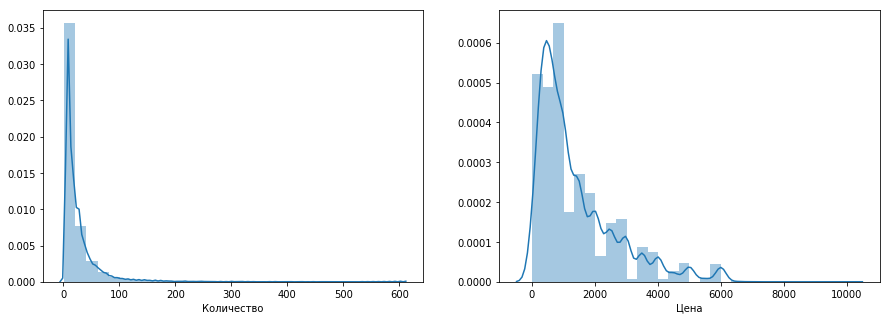

In [24]:
fig, axes = pyplot.subplots(1,2, figsize=(15,5))
i = 0
for feature in real_cols:
    sns.distplot(a = real_data[feature], bins = 30, ax=axes[i], label = feature)
    i+=1

In [25]:
from sklearn import model_selection
x = np.hstack((real_data,encoded_cat_data))

x_train1, x_test1, y_train, y_test = model_selection.train_test_split(x,target, test_size=0.2,random_state=143,shuffle=True)


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train1)
x_train = scaler.transform(x_train1)
x_test = scaler.transform(x_test1)

In [28]:
from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

['scaler.save']

In [29]:
y_train = y_train.values
y_test = y_test.values

In [30]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding,LSTM, Dropout,GRU,BatchNormalization,ELU,Layer
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras import regularizers
from keras import backend as K


Using TensorFlow backend.


In [31]:
def graph(y_test,y_pred,count,start=0,k=np.array([])):
    end = start+count
    x_sel = np.arange(start,end)
    y_test_sel = y_test[start:end]
    y_pr_sel = y_pred[start:end]
    y_pr = np.array([])
    y_test = np.array([])
    x = np.array([])

    for i in zip(x_sel,x_sel+1):
        x = np.append(x,i[0])
        x = np.append(x,i[1])

    for i in zip(y_test_sel,y_test_sel):
        y_test = np.append(y_test,i[0])
        y_test = np.append(y_test,i[1])
        
    for i in zip(y_pr_sel,y_pr_sel):
        y_pr = np.append(y_pr,i[0])
        y_pr = np.append(y_pr,i[1])

    pyplot.figure(figsize=(20,10))
    pyplot.plot(x, y_test, label="Тестовые данные",linewidth=3.)
    pyplot.plot(x, y_pr, label="Предсказания",linestyle="-.",linewidth=2.)
    
    
    if(k.any()):
        k_sel = k[start:end]
        k = np.array([])
        for i in zip(k_sel,k_sel):
            k = np.append(k,i[0])
            k = np.append(k,i[1])

        pyplot.plot(x, k, label="Количество",linestyle="--",linewidth=2.)
    
    pyplot.xlabel('Номер объекта',fontsize=18)
    pyplot.ylabel('Продано билетов',fontsize=18)
    pyplot.legend()

In [32]:
def metric_quality(y,predict,k):
    return np.sum(abs(y-predict)/k)/y.shape[0]

In [33]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
from math import sqrt
def metric_confint(y,predict,k):
    score = abs(y-predict)/k
    mean_std = score.std(ddof=1)/sqrt(len(score))
    mean = np.mean(score)
    return _tconfint_generic(mean, mean_std,len(score) - 1, 0.05, 'two-sided')

In [29]:
#lstm_model = Sequential()
#lstm_model.add(BatchNormalization())
#lstm_model.add(LSTM(40, recurrent_dropout = 0.0, dropout = 0.0,return_sequences=True))
#lstm_model.add(BatchNormalization())
#lstm_model.add(LSTM(30, recurrent_dropout = 0.0, dropout = 0.0))
#lstm_model.add(BatchNormalization())
#lstm_model.add(Dense(1, activation = 'elu'))

Train on 11856 samples, validate on 2965 samples
Epoch 1/400
11856/11856 [==============================] - 13s 1ms/step - loss: 13.5331 - mean_absolute_error: 13.5331 - val_loss: 12.6992 - val_mean_absolute_error: 12.6992
Epoch 2/400
11856/11856 [==============================] - 1s 94us/step - loss: 11.9071 - mean_absolute_error: 11.9071 - val_loss: 11.0860 - val_mean_absolute_error: 11.0860
Epoch 3/400
11856/11856 [==============================] - 1s 79us/step - loss: 10.6864 - mean_absolute_error: 10.6864 - val_loss: 9.9251 - val_mean_absolute_error: 9.9251
Epoch 4/400
11856/11856 [==============================] - 1s 87us/step - loss: 9.5014 - mean_absolute_error: 9.5014 - val_loss: 8.7340 - val_mean_absolute_error: 8.7340
Epoch 5/400
11856/11856 [==============================] - 1s 71us/step - loss: 8.5478 - mean_absolute_error: 8.5478 - val_loss: 7.9255 - val_mean_absolute_error: 7.9255
Epoch 6/400
11856/11856 [==============================] - 1s 84us/step - loss: 7.7364 - me

11856/11856 [==============================] - 1s 84us/step - loss: 3.4083 - mean_absolute_error: 3.4083 - val_loss: 3.0575 - val_mean_absolute_error: 3.0575
Epoch 91/400
11856/11856 [==============================] - 1s 83us/step - loss: 3.3218 - mean_absolute_error: 3.3218 - val_loss: 3.1222 - val_mean_absolute_error: 3.1222
Epoch 92/400
11856/11856 [==============================] - 1s 77us/step - loss: 3.4793 - mean_absolute_error: 3.4793 - val_loss: 3.2793 - val_mean_absolute_error: 3.2793
Epoch 93/400
11856/11856 [==============================] - 1s 106us/step - loss: 3.3643 - mean_absolute_error: 3.3643 - val_loss: 3.1065 - val_mean_absolute_error: 3.1065: 0s - loss: 3.4191 - mean_absolute_error
Epoch 94/400
11856/11856 [==============================] - 1s 83us/step - loss: 3.3793 - mean_absolute_error: 3.3793 - val_loss: 3.0595 - val_mean_absolute_error: 3.0595

Epoch 00094: ReduceLROnPlateau reducing learning rate to 0.00047829695977270604.
Epoch 95/400
11856/11856 [========

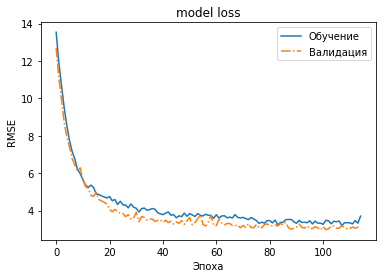

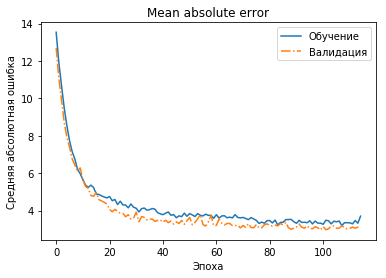

Test quality 0.12272551623580269


In [93]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
    
lstm_model = Sequential()
lstm_model.add(BatchNormalization())
lstm_model.add(LSTM(40, recurrent_dropout = 0.0, dropout = 0.0,return_sequences=True))
lstm_model.add(BatchNormalization())
lstm_model.add(LSTM(30, recurrent_dropout = 0.0, dropout = 0.0))
lstm_model.add(BatchNormalization())
lstm_model.add(Dense(1, activation = 'elu'))

early_stopping_monitor = EarlyStopping(patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)
lstm_model.compile(loss = root_mean_squared_error, optimizer = 'rmsprop',metrics = ['mae'])
 
history = lstm_model.fit(x_train.reshape(x_train.shape[0],1,x_train.shape[1]), y_train, batch_size = 200,epochs = 400,validation_split=0.2, callbacks=[early_stopping_monitor,reduce_lr])
pyplot.figure()
pyplot.plot(history.history['loss'],linestyle="-")
pyplot.plot(history.history['val_loss'],linestyle="-.")
pyplot.title('model loss')
pyplot.ylabel('RMSE')
pyplot.xlabel('Эпоха')
pyplot.legend(['Обучение', 'Валидация'], loc='best')
pyplot.show()
pyplot.figure()
pyplot.plot(history.history['mean_absolute_error'],linestyle="-")
pyplot.plot(history.history['val_mean_absolute_error'],linestyle="-.")
pyplot.title('Mean absolute error')
pyplot.ylabel('Средняя абсолютная ошибка')
pyplot.xlabel('Эпоха')
pyplot.legend(['Обучение', 'Валидация'], loc='best')
pyplot.show()
result = lstm_model.predict(x_test.reshape(x_test.shape[0],1,x_test.shape[1]))
score = lstm_model.evaluate(x_test.reshape(x_test.shape[0],1,x_test.shape[1]), y_test, verbose=0)

pred = result
for i in np.arange(x_test1[:,0:1].shape[0]):
    if(x_test1[i:i+1,0:1] < np.round(result[i],0)):
       # print(x_test1[i:i+1,0:1], np.round(result[i],0),y_test[i])
        pred[i] = y_test[i]
        
        
print('Test quality',metric_quality(y_test.reshape(y_test.shape[0],1), np.round(pred,0),x_test1[:,0:1]))
for i in np.arange(x_test1[:,0:1].shape[0]):
    if(x_test1[i:i+1,0:1] < np.round(result[i],0)):
       # print(x_test1[i:i+1,0:1], np.round(result[i],0),y_test[i])
        pred[i] = y_test[i]
        
        
print('Test quality ',metric_confint(y_test.reshape(y_test.shape[0],1), np.round(pred,0),x_test1[:,0:1]))
graph(y_test,pred,100,60)

In [63]:
#lstm_model.save("11.8%_lstm_final_2.h5")

In [97]:
pred = result
for i in np.arange(x_test1[:,0:1].shape[0]):
    if(x_test1[i:i+1,0:1] < np.round(result[i],0)):
        pred[i] = y_test[i]
        
        
print('Test quality',metric_quality(y_test.reshape(y_test.shape[0],1), np.round(pred,0),x_test1[:,0:1]))

Test quality 0.1218213268066925


In [77]:
x_train.shape

(14821, 43)

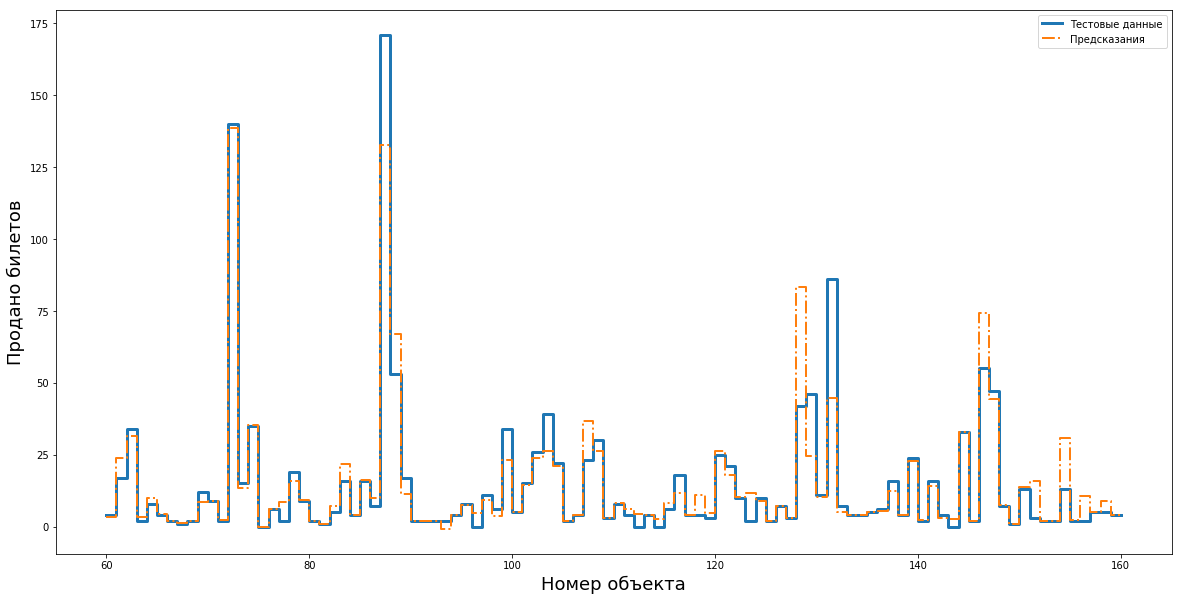

In [62]:
graph(y_test,pred,100,60)

Train on 11856 samples, validate on 2965 samples
Epoch 1/300
11856/11856 [==============================] - 7s 605us/step - loss: 12.7605 - mean_absolute_error: 12.7605 - val_loss: 11.9609 - val_mean_absolute_error: 11.9609
Epoch 2/300
11856/11856 [==============================] - 1s 53us/step - loss: 7.8801 - mean_absolute_error: 7.8801 - val_loss: 8.1479 - val_mean_absolute_error: 8.1479
Epoch 3/300
11856/11856 [==============================] - 1s 47us/step - loss: 5.8643 - mean_absolute_error: 5.8643 - val_loss: 7.0878 - val_mean_absolute_error: 7.0878
Epoch 4/300
11856/11856 [==============================] - 1s 56us/step - loss: 5.2902 - mean_absolute_error: 5.2902 - val_loss: 5.1615 - val_mean_absolute_error: 5.1615
Epoch 5/300
11856/11856 [==============================] - 1s 46us/step - loss: 4.9924 - mean_absolute_error: 4.9924 - val_loss: 5.3992 - val_mean_absolute_error: 5.3992
Epoch 6/300
11856/11856 [==============================] - 1s 50us/step - loss: 4.7816 - mean_ab

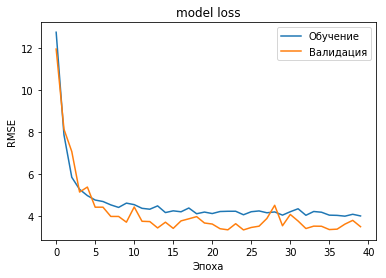

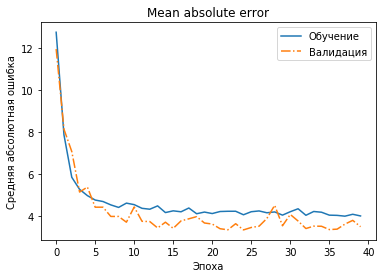

Test quality 0.09249621755389625


In [70]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

batch_size = 200
mlp_model = Sequential()
mlp_model.add(BatchNormalization())
mlp_model.add(Dense(41,activation="tanh",kernel_initializer='normal'))

mlp_model.add(BatchNormalization())
mlp_model.add(Dense(30,activation="relu",kernel_initializer='normal'))

mlp_model.add(BatchNormalization())
mlp_model.add(Dense(30,activation="relu",kernel_initializer='normal'))


mlp_model.add(BatchNormalization())
mlp_model.add(Dense(1,activation="elu",kernel_initializer='normal'))

#41 27 4 1
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)
early_stopping_monitor = EarlyStopping(patience=15)

mlp_model.compile(loss=root_mean_squared_error,
              optimizer='adadelta',metrics=["mae"])


history = mlp_model.fit(
    x_train, y_train, 
    batch_size=batch_size, 
    epochs=300,
    validation_split=0.2,
    callbacks=[reduce_lr,early_stopping_monitor]
)
pyplot.figure()
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('RMSE')
pyplot.xlabel('Эпоха')
pyplot.legend(['Обучение', 'Валидация'], loc='best')
pyplot.show()
pyplot.figure()
pyplot.plot(history.history['mean_absolute_error'],linestyle="-")
pyplot.plot(history.history['val_mean_absolute_error'],linestyle="-.")
pyplot.title('Mean absolute error')
pyplot.ylabel('Средняя абсолютная ошибка')
pyplot.xlabel('Эпоха')
pyplot.legend(['Обучение', 'Валидация'], loc='best')
pyplot.show()

result = mlp_model.predict(x_test1)
score = mlp_model.evaluate(x_test1, y_test, verbose=0)
pred = result
for i in np.arange(x_test1[:,0:1].shape[0]):
    if(x_test1[i:i+1,0:1] < np.round(result[i],0)):
       # print(x_test1[i:i+1,0:1], np.round(result[i],0),y_test[i])
        pred[i] = y_test[i]
        
        
print('Test quality',metric_quality(y_test.reshape(y_test.shape[0],1), np.round(pred,0),x_test1[:,0:1]))

In [70]:
pred = result
for i in np.arange(x_test1[:,0:1].shape[0]):
    if(x_test1[i:i+1,0:1] < np.round(result[i],0)):
       # print(x_test1[i:i+1,0:1], np.round(result[i],0),y_test[i])
        pred[i] = y_test[i]
        
        
print('Test quality',metric_quality(y_test.reshape(y_test.shape[0],1), np.round(pred,0),x_test1[:,0:1]))

Test quality 0.1522292047930145


In [54]:
#mlp_model.save("9.16%_mlp_final_3.h5")

In [73]:
from keras.models import load_model
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

model = load_model('5.7%_mlp_final_4.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error})

In [90]:

pred = result
for i in np.arange(x_test1[:,0:1].shape[0]):
    if(x_test1[i:i+1,0:1] < np.round(result[i],0)):
       # print(x_test1[i:i+1,0:1], np.round(result[i],0),y_test[i])
        pred[i] = y_test[i]
        
        
print('Test quality ',metric_confint(y_test.reshape(y_test.shape[0],1), np.round(pred,0),x_test1[:,0:1]))

Test quality  (0.11472917107027014, 0.12753159697380217)


In [95]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

Train on 11856 samples, validate on 2965 samples
Epoch 1/400
11856/11856 [==============================] - 11s 939us/step - loss: 14.5632 - mean_absolute_error: 14.5632 - val_loss: 14.3235 - val_mean_absolute_error: 14.3235
Epoch 2/400
11856/11856 [==============================] - 1s 103us/step - loss: 13.6936 - mean_absolute_error: 13.6936 - val_loss: 13.2608 - val_mean_absolute_error: 13.2608
Epoch 3/400
11856/11856 [==============================] - 1s 97us/step - loss: 12.6586 - mean_absolute_error: 12.6586 - val_loss: 12.2755 - val_mean_absolute_error: 12.2755
Epoch 4/400
11856/11856 [==============================] - 1s 105us/step - loss: 11.7618 - mean_absolute_error: 11.7618 - val_loss: 11.3324 - val_mean_absolute_error: 11.3324
Epoch 5/400
11856/11856 [==============================] - 1s 112us/step - loss: 10.8283 - mean_absolute_error: 10.8283 - val_loss: 10.2453 - val_mean_absolute_error: 10.2453
Epoch 6/400
11856/11856 [==============================] - 1s 114us/step - l

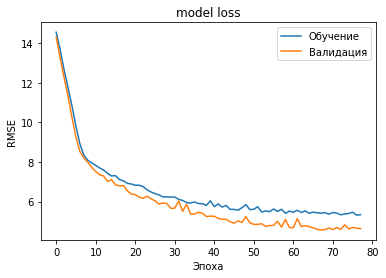

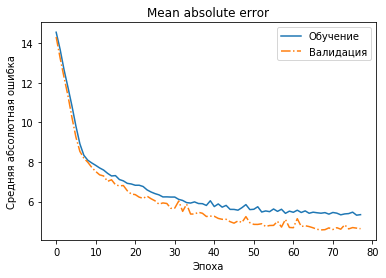

Test quality 0.17036303426181004
Test quality  (0.1642439669004461, 0.176482101623174)


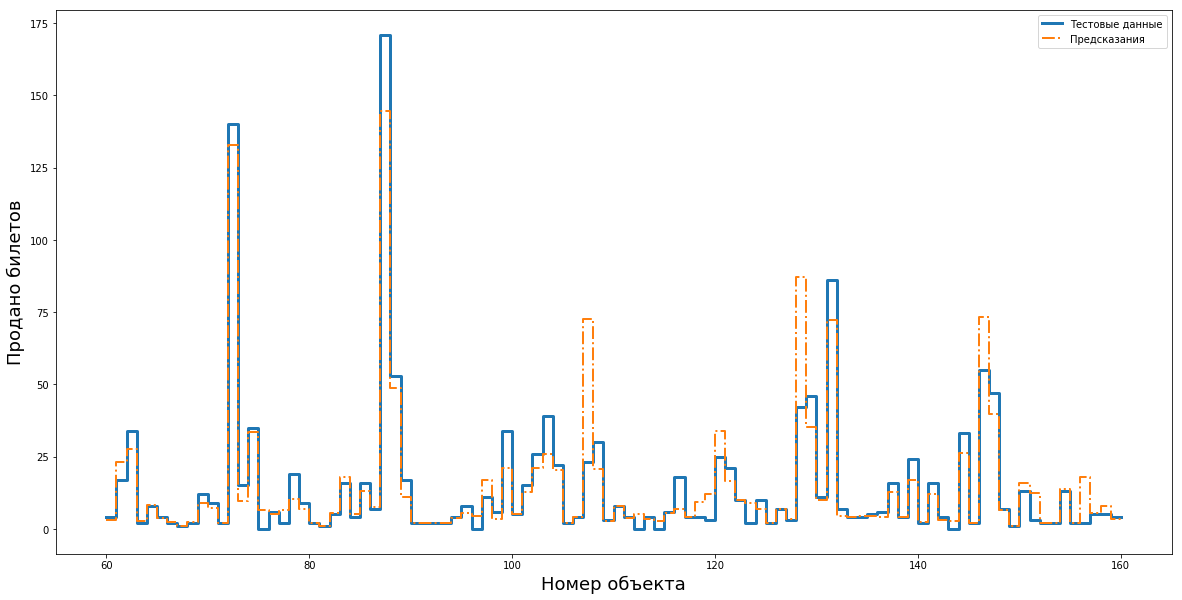

In [101]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 


batch_size = 200
rbf_model = Sequential()

#rbf_model.add(Dense(40))
rbf_model.add(BatchNormalization())
rbf_model.add(RBFLayer(50,0.14))
rbf_model.add(BatchNormalization())
rbf_model.add(Dense(1,activation="linear"))


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)
early_stopping_monitor = EarlyStopping(patience=10)

rbf_model.compile(loss=root_mean_squared_error, optimizer='adam',metrics=["mae"])


history = rbf_model.fit(
    x_train, y_train, 
    batch_size=batch_size, 
    epochs=400,
    validation_split=0.2,
    callbacks=[reduce_lr,early_stopping_monitor]
)
pyplot.figure()
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('RMSE')
pyplot.xlabel('Эпоха')
pyplot.legend(['Обучение', 'Валидация'], loc='best')
pyplot.show()
pyplot.figure()
pyplot.plot(history.history['mean_absolute_error'],linestyle="-")
pyplot.plot(history.history['val_mean_absolute_error'],linestyle="-.")
pyplot.title('Mean absolute error')
pyplot.ylabel('Средняя абсолютная ошибка')
pyplot.xlabel('Эпоха')
pyplot.legend(['Обучение', 'Валидация'], loc='best')
pyplot.show()

result = rbf_model.predict(x_test)
score = rbf_model.evaluate(x_test, y_test, verbose=0)
pred = result
for i in np.arange(x_test1[:,0:1].shape[0]):
    if(x_test1[i:i+1,0:1] < np.round(result[i],0)):
       # print(x_test1[i:i+1,0:1], np.round(result[i],0),y_test[i])
        pred[i] = y_test[i]
        
        
print('Test quality',metric_quality(y_test.reshape(y_test.shape[0],1), np.round(pred,0),x_test1[:,0:1]))
for i in np.arange(x_test1[:,0:1].shape[0]):
    if(x_test1[i:i+1,0:1] < np.round(result[i],0)):
       # print(x_test1[i:i+1,0:1], np.round(result[i],0),y_test[i])
        pred[i] = y_test[i]
        
        
print('Test quality ',metric_confint(y_test.reshape(y_test.shape[0],1), np.round(pred,0),x_test1[:,0:1]))
graph(y_test,pred,100,60)

In [34]:
#rbf_model.save("18.7%_rbf_final_1.h5")

In [34]:
from keras.models import load_model
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

model = load_model('5.7%_mlp_final_4.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error})

In [35]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
from math import sqrt
def metric_confint1(y,predict,k):
    score = abs(y-predict)/k
    mean_std = score.std(ddof=1)/sqrt(len(score))
    print(mean_std)
    mean = np.mean(score)
    print(mean)
    print(score.shape)
    return _tconfint_generic(mean, mean_std,len(score) - 1, 0.05, 'two-sided')

In [37]:
result = model.predict(x_test)
score = model.evaluate(x_test, y_test, verbose=0)
pred = result
for i in np.arange(x_test1[:,0:1].shape[0]):
    if(x_test1[i:i+1,0:1] < np.round(result[i],0)):
       # print(x_test1[i:i+1,0:1], np.round(result[i],0),y_test[i])
        pred[i] = y_test[i]
         
        
print('Test quality ',metric_confint1(y_test.reshape(y_test.shape[0],1), np.round(pred,0),x_test1[:,0:1]))

0.0034989091193414162
0.12903604270182706
(3706, 1)
Test quality  (0.12217606580965147, 0.13589601959400263)
